In [1]:
from flymazerl.agents.qlearning import DFLTQLearnerHM_acceptreject
from flymazerl.gym.environment import ymaze_static
import numpy as np
import matplotlib.pyplot as plt

In [2]:
env = ymaze_static(100,0.25)
agent = DFLTQLearnerHM_acceptreject(env)

In [3]:
action_set = np.loadtxt("../../../data/action_set.csv", delimiter=",", dtype=np.int32)
reward_set = np.loadtxt("../../../data/reward_set.csv", delimiter=",", dtype=np.int32)
model,data,post_predictive = agent.fit(actions_set=action_set, rewards_set=reward_set, nparallel=2, return_predictives=True)

WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{int16::}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{:int16:}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{:int16:}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{int16::}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{int16::}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{:int16:}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{int16::}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{:int16:}.0
WARNING (theano.tensor.opt): Cannot construct a 

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 22357 seconds.
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{int16::}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{int16::}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{:int16:}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{int16::}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{int16::}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{int16::}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{:int16:}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test 

WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{int16::}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{int16::}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{:int16:}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{int16::}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{int16::}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{int16::}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{:int16:}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{int16::}.0
WARNING (theano.tensor.opt): Cannot construct a 

                 mean     sd  hdi_2.5%  ...  ess_bulk  ess_tail  r_hat
init_q_mean[0] -0.483  0.455    -1.395  ...      37.0     183.0   1.06
init_q_mean[1] -0.749  0.397    -1.682  ...      60.0     136.0   1.06
init_q_0[0]    -0.691  0.699    -2.000  ...      92.0     247.0   1.02
init_q_0[1]    -0.429  0.599    -1.699  ...     123.0     269.0   1.04
init_q_0[2]    -0.272  0.748    -1.670  ...      92.0     195.0   1.05
...               ...    ...       ...  ...       ...       ...    ...
gamma[13]       0.156  0.216     0.000  ...      22.0      38.0   1.10
gamma[14]       0.263  0.233     0.000  ...      28.0      25.0   1.07
gamma[15]       0.213  0.231     0.000  ...      32.0      81.0   1.08
gamma[16]       0.114  0.157     0.000  ...      28.0     112.0   1.07
gamma[17]       0.271  0.248     0.000  ...      10.0      36.0   1.15

[250 rows x 9 columns]


In [4]:
# create a summary of the trace
from pymc3.stats import summary
from pymc3.plots import plot_trace,forestplot, plot_posterior, plot_ppc
summary_df = summary(data)

C:\Users\labadmin\AppData\Local\Temp\ipykernel_36708\1305322851.py:2: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  forestplot(data,combined=True,var_names=["alpha"])


array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

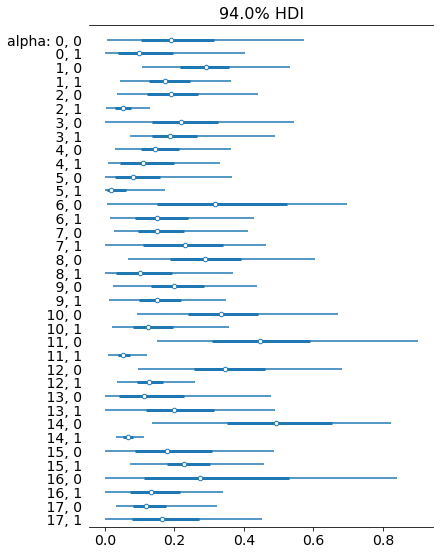

In [5]:
# make a forest plot of the trace
forestplot(data,combined=True,var_names=["alpha"])

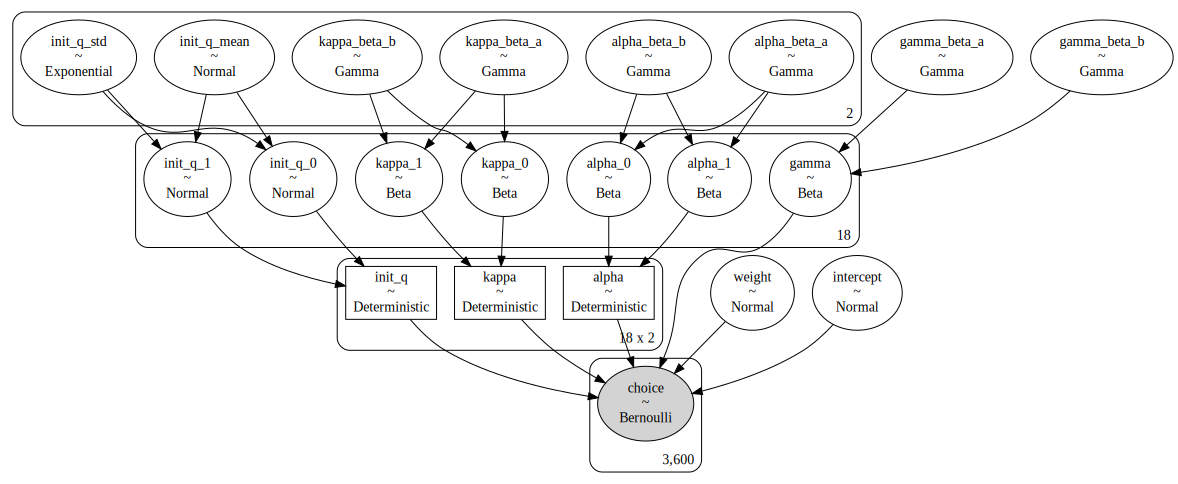

In [6]:
import pymc3 as pm

pm.model_to_graphviz(model)

In [7]:
post_predictive['choice']

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 1, 0],
       ...,
       [0, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

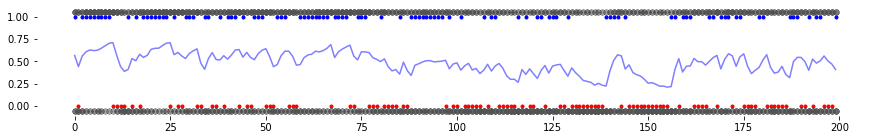

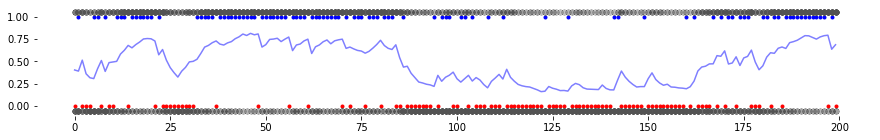

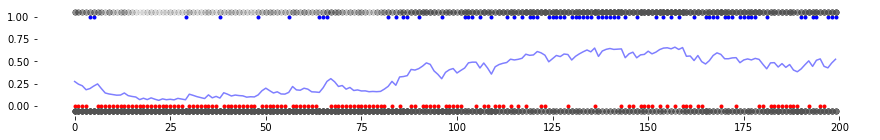

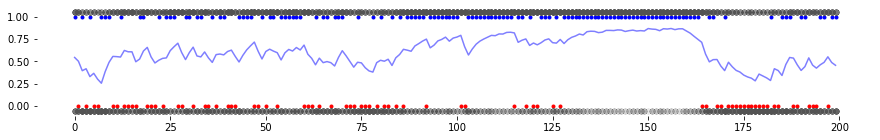

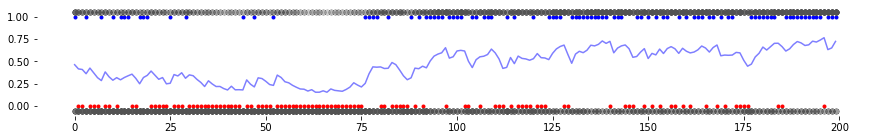

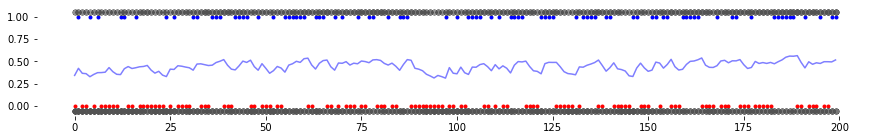

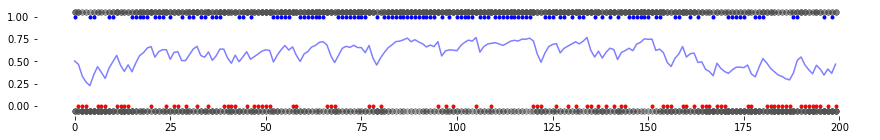

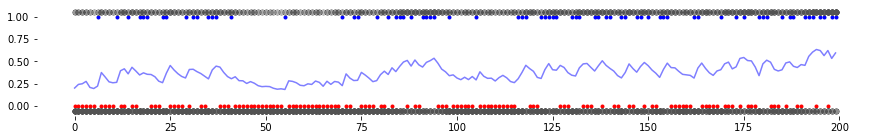

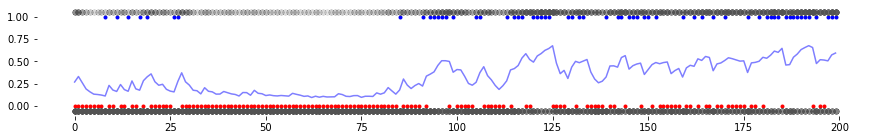

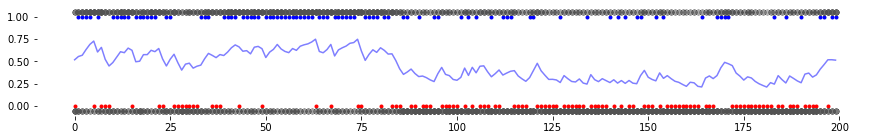

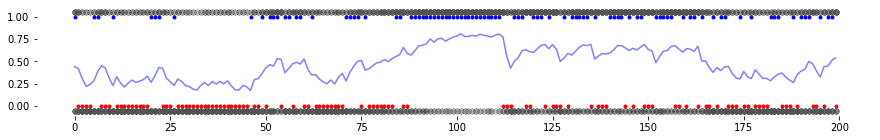

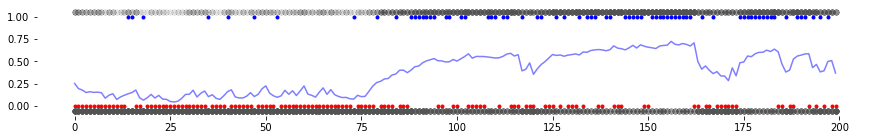

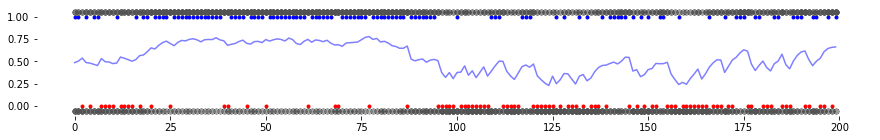

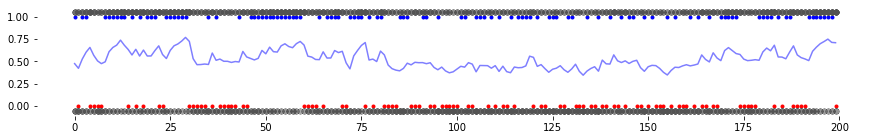

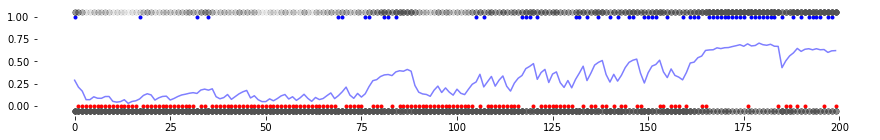

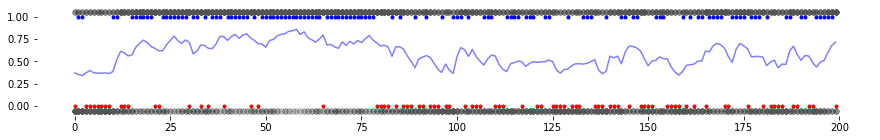

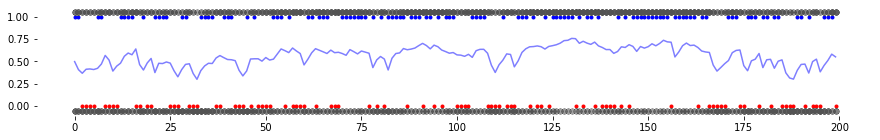

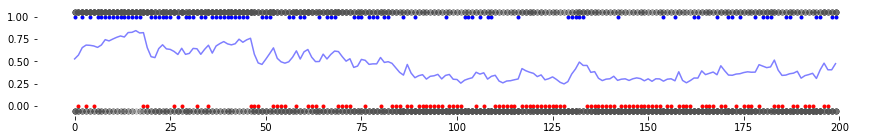

In [8]:
from statistics import variance

post_predictions = np.array_split(post_predictive['choice'], 18, axis=1)

for i in range(len(action_set)):
    fig,ax = plt.subplots(1,1,figsize=(15,2))
    choice_0 = np.arange(len(action_set[i]))[action_set[i]==0]
    plt.plot(choice_0,np.zeros_like(choice_0),'.',color='red')
    choice_1 = np.arange(len(action_set[i]))[action_set[i]==1]
    plt.plot(choice_1,np.ones_like(choice_1),'.',color='blue')
    # plot the posterior predictive
    post_mean = np.mean(post_predictions[i],axis=0)
    plt.plot(np.arange(200),post_mean,'-',color='blue',alpha=0.5)
    for j in range(len(post_predictions[i])//10):
        plt.plot(np.arange(200),0.5+(post_predictions[i][j]-0.5)*1.1,'o',color='k',alpha=0.01)
    plt.box(False)
    plt.show()

In [52]:
pm.sample_posterior_predictive(data, samples=1000, model=model)

c:\ProgramData\Anaconda3\envs\flymazerl\lib\site-packages\pymc3\sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


{'choice': array([[1, 0, 1, ..., 0, 1, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [0, 1, 1, ..., 1, 0, 0],
        ...,
        [0, 1, 0, ..., 1, 0, 0],
        [1, 0, 0, ..., 0, 1, 1],
        [0, 1, 0, ..., 0, 0, 1]])}